In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [ ]:
img_path = "/content/Digit_classifier_MNIST_DL/assets/"         #path of the test images.

In [ ]:
mnist = tf.keras.datasets.mnist #28 x 28 images of hand written digits 0-9

In [ ]:
(x_train , y_train),(x_test , y_test) = mnist.load_data()

Normalize the dataset

In [ ]:
y_test = tf.keras.utils.to_categorical(y_test)
y_train = tf.keras.utils.to_categorical(y_train)

In [ ]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=1)

In [ ]:
print(x_test.shape,y_test.shape)

(10000, 28, 28) (10000, 10)


In [ ]:
print(x_val.shape,y_val.shape)

(6000, 28, 28) (6000, 10)


In [ ]:
print(x_train.shape,y_train.shape)

(54000, 28, 28) (54000, 10)


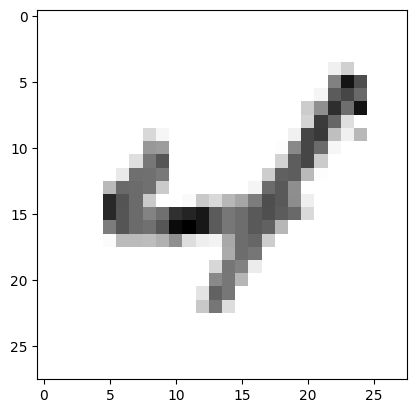

In [ ]:
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [ ]:
model_ANN = tf.keras.models.Sequential()

model_ANN.add(tf.keras.layers.Flatten())

model_ANN.add(tf.keras.layers.Dense(388,activation=tf.nn.relu))

model_ANN.add(tf.keras.layers.Dense(132,activation=tf.nn.relu))

model_ANN.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

model_ANN.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
history_ANN = model_ANN.fit(x_train,
                           y_train,
                           epochs=10, 
                           batch_size = 128, 
                           validation_data = (x_val,y_val),
                           callbacks=[tf.keras.callbacks.TensorBoard(log_dir="logs")]
                           )

Epoch 1/10
422/422 [==============================] - 6s 10ms/step - loss: 0.3119 - accuracy: 0.9103 - val_loss: 0.1682 - val_accuracy: 0.9503
Epoch 2/10
422/422 [==============================] - 3s 7ms/step - loss: 0.1158 - accuracy: 0.9649 - val_loss: 0.1125 - val_accuracy: 0.9665
Epoch 3/10
422/422 [==============================] - 3s 7ms/step - loss: 0.0739 - accuracy: 0.9778 - val_loss: 0.0939 - val_accuracy: 0.9733
Epoch 4/10
422/422 [==============================] - 3s 8ms/step - loss: 0.0522 - accuracy: 0.9841 - val_loss: 0.1017 - val_accuracy: 0.9715
Epoch 5/10
422/422 [==============================] - 3s 8ms/step - loss: 0.0387 - accuracy: 0.9880 - val_loss: 0.0905 - val_accuracy: 0.9758
Epoch 6/10
422/422 [==============================] - 3s 7ms/step - loss: 0.0273 - accuracy: 0.9916 - val_loss: 0.0874 - val_accuracy: 0.9758
Epoch 7/10
422/422 [==============================] - 3s 7ms/step - loss: 0.0194 - accuracy: 0.9942 - val_loss: 0.0987 - val_accuracy: 0.9700
Epoch

In [ ]:
model_ANN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 388)               304580    
                                                                 
 dense_1 (Dense)             (None, 132)               51348     
                                                                 
 dense_2 (Dense)             (None, 10)                1330      
                                                                 
Total params: 357,258
Trainable params: 357,258
Non-trainable params: 0
_________________________________________________________________


### Prediction of the ANN model:

In [ ]:
prediction = model_ANN.predict([x_test])

313/313 [==============================] - 1s 2ms/step


In [ ]:
print (prediction)

[[7.69355350e-14 2.38300542e-11 8.59703003e-11 ... 9.99999940e-01
  1.81926319e-13 4.88345822e-11]
 [1.78015358e-14 1.42842773e-05 9.99985635e-01 ... 1.05692083e-15
  1.36846643e-12 2.68926550e-19]
 [5.63603816e-11 9.99992311e-01 8.56612417e-08 ... 5.92788592e-06
  1.87207732e-07 2.23613114e-10]
 ...
 [2.05907926e-16 1.11873059e-10 2.15327037e-13 ... 2.39687936e-09
  4.59028260e-10 1.11081562e-08]
 [2.27354295e-13 5.13120033e-11 1.22980196e-12 ... 2.42076387e-10
  1.10273504e-07 1.87560030e-15]
 [2.86325200e-11 3.85883729e-12 1.80446682e-11 ... 9.42439181e-15
  1.26698114e-11 2.00458412e-18]]


In [ ]:
print (np.argmax(prediction[1]))

2


<function matplotlib.pyplot.show(close=None, block=None)>

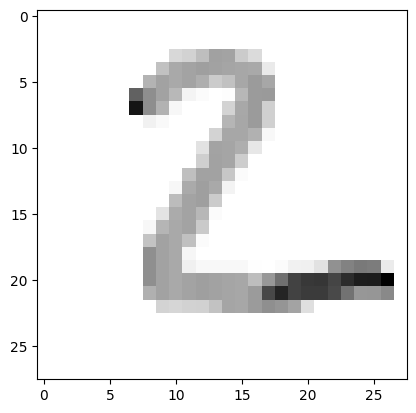

In [ ]:
plt.imshow(x_test[1],cmap=plt.cm.binary)
plt.show

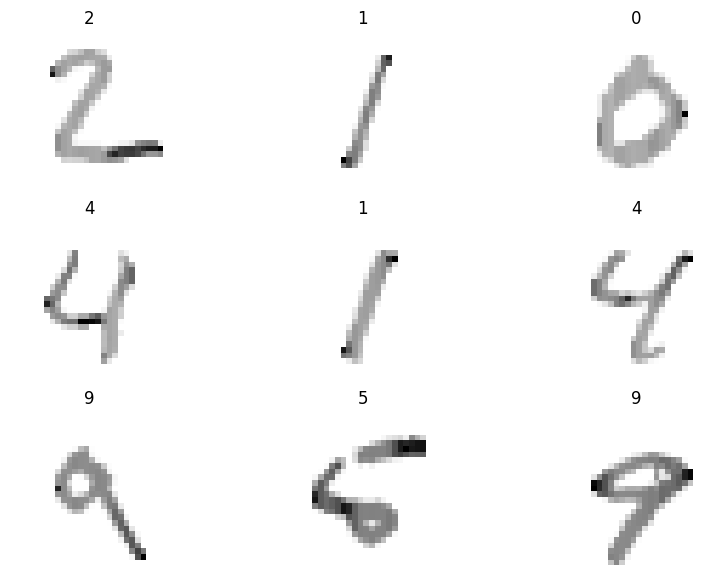

In [ ]:
fig = plt.figure(figsize=(10, 7))

rows = 3
columns = 3
fig.suptitle("ANN on Test images from dataset")

for p in range (1,10):
    fig.add_subplot(rows, columns, (p))
    plt.imshow(x_test[p],cmap=plt.cm.binary)
    plt.axis('off')
    plt.title(np.argmax(prediction[p])) 

### Prediction on images from source other than the test dataset:

1/1 [==============================] - 0s 16ms/step


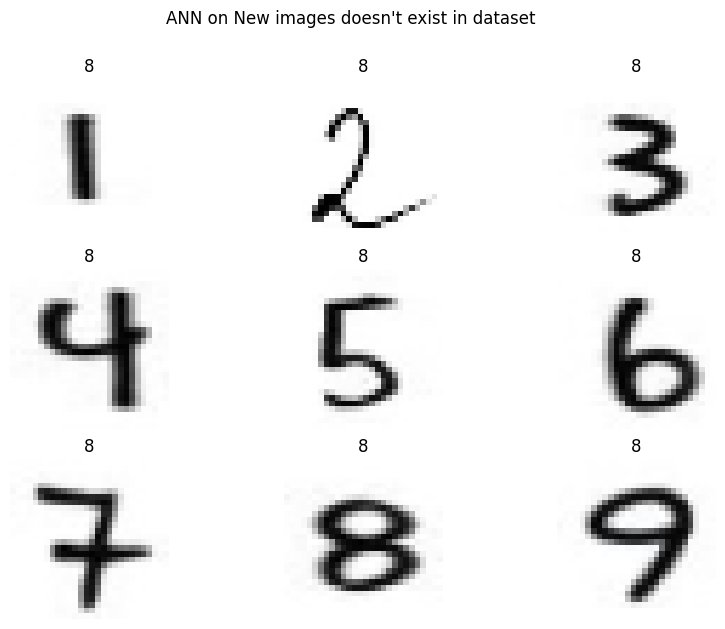

In [ ]:
row = 3
col = 3

fig = plt.figure(figsize=(10, 7))

fig.suptitle("ANN on New images doesn't exist in dataset")
for i in range (1,10):

    fig.add_subplot(row,col,i)
    p = plt.imread(img_path + str(i) + ".jpg")
    p = cv2.resize (p , (28,28))
    # p = cv2.dilate(p.copy(), None, iterations = 1)
    plt.imshow(p,cmap=plt.cm.binary)
    pred = model_ANN.predict([p.reshape(-1,28,28)])
    plt.title(np.argmax(pred))
    plt.axis('off')

### Confusion matrix for the ANN model:

In [ ]:
y_prediction = np.argmax(model_ANN.predict(x_test),axis=1)
ytest = np.argmax(y_test,axis=1)
cm_ANN = confusion_matrix(ytest, y_prediction )
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ANN,
                                  display_labels=[i for i in range (0,10)])

313/313 [==============================] - 1s 2ms/step


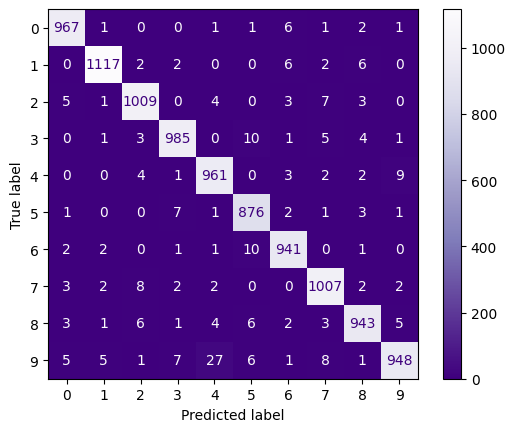

In [ ]:
disp.plot(cmap=plt.cm.Purples_r)
plt.show()

## Model in CNN:

In [ ]:
model_CNN = tf.keras.models.Sequential()
model_CNN.add(tf.keras.layers.Conv2D(64, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model_CNN.add(tf.keras.layers.MaxPooling2D((2, 2)))

model_CNN.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
model_CNN.add(tf.keras.layers.MaxPooling2D((2, 2)))

model_CNN.add(tf.keras.layers.Conv2D(32, (5, 5), activation='relu'))


model_CNN.add(tf.keras.layers.Flatten())

model_CNN.add(tf.keras.layers.Dense(120, activation='relu'))          
model_CNN.add(tf.keras.layers.Dense(84, activation='relu'))          
model_CNN.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model_CNN.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 24, 24, 64)        1664      
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 10, 10, 32)        18464     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_54 (Conv2D)          (None, 1, 1, 32)          25632     
                                                                 
 flatten_18 (Flatten)        (None, 32)              

In [ ]:
model_CNN.compile(optimizer='adam',
             loss='categorical_crossentropy',         #sparse_categorical_crossentropy
             metrics=['accuracy'])

In [ ]:
history_CNN = model_CNN.fit(
                            x_train,
                            y_train,
                            epochs = 10, 
                            batch_size = 128,
                            callbacks=[tf.keras.callbacks.TensorBoard(log_dir="logs")],
                            validation_data = (x_val , y_val)
                            )

Epoch 1/10
422/422 [==============================] - 44s 102ms/step - loss: 0.3653 - accuracy: 0.8873 - val_loss: 0.1345 - val_accuracy: 0.9605
Epoch 2/10
422/422 [==============================] - 41s 97ms/step - loss: 0.0925 - accuracy: 0.9709 - val_loss: 0.1051 - val_accuracy: 0.9667
Epoch 3/10
422/422 [==============================] - 43s 102ms/step - loss: 0.0669 - accuracy: 0.9789 - val_loss: 0.0691 - val_accuracy: 0.9783
Epoch 4/10
422/422 [==============================] - 41s 98ms/step - loss: 0.0523 - accuracy: 0.9838 - val_loss: 0.0628 - val_accuracy: 0.9822
Epoch 5/10
422/422 [==============================] - 42s 98ms/step - loss: 0.0421 - accuracy: 0.9869 - val_loss: 0.0696 - val_accuracy: 0.9807
Epoch 6/10
422/422 [==============================] - 41s 98ms/step - loss: 0.0355 - accuracy: 0.9884 - val_loss: 0.0601 - val_accuracy: 0.9818
Epoch 7/10
422/422 [==============================] - 42s 100ms/step - loss: 0.0305 - accuracy: 0.9902 - val_loss: 0.0523 - val_accura

In [ ]:
# model.save('epic_model_CNN_num_detection')

In [ ]:
# new_model = tf.keras.models.load_model('epic_model_num_detection')
# new_model

### Prediction of the CNN model:

313/313 [==============================] - 3s 8ms/step


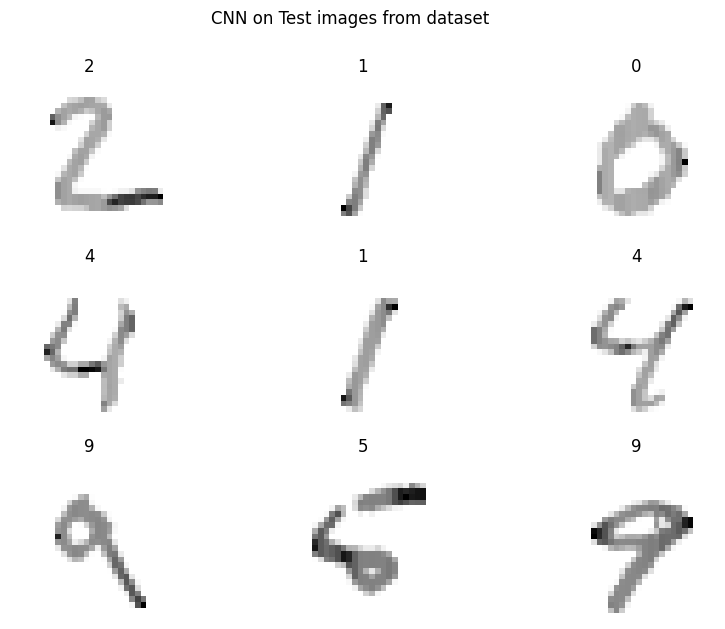

In [ ]:
fig = plt.figure(figsize=(10, 7))

rows = 3
columns = 3
new_pred = model_CNN.predict([x_test])
fig.suptitle("CNN on Test images from dataset")
for p in range (1,10):
    fig.add_subplot(rows, columns, (p))
    
    plt.imshow(x_test[p],cmap=plt.cm.binary)
    plt.axis('off')
    plt.title(np.argmax(new_pred[p])) 

### Prediction on images from source other than the test dataset:

1/1 [==============================] - 0s 19ms/step


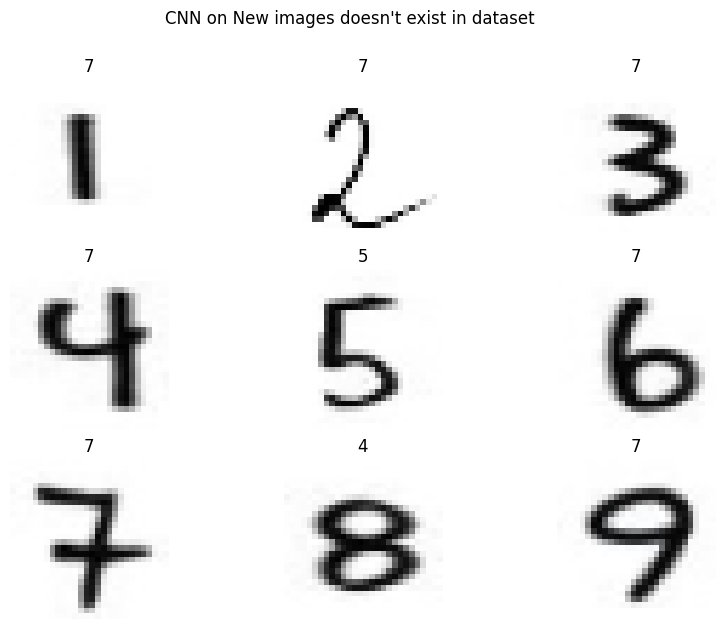

In [ ]:
row = 3
col = 3

fig = plt.figure(figsize=(10, 7))
fig.suptitle("CNN on New images doesn't exist in dataset")

for i in range (1,10):

    fig.add_subplot(row,col,i)
    p = plt.imread(img_path + str(i) + ".jpg")
    p = cv2.resize (p , (28,28))
    plt.imshow(p,cmap=plt.cm.binary)
    pred = model_CNN.predict([p.reshape(-1,28,28,1)])
    plt.title(np.argmax(pred))
    plt.axis('off')

### Confusion matrix for the CNN model:

In [ ]:
y_prediction = np.argmax(model_CNN.predict(x_test),axis=1)
ytest = np.argmax(y_test,axis=1)
cm_CNN = confusion_matrix(ytest, y_prediction )
disp = ConfusionMatrixDisplay(confusion_matrix=cm_CNN,
                                  display_labels=[i for i in range (0,10)])

313/313 [==============================] - 2s 7ms/step


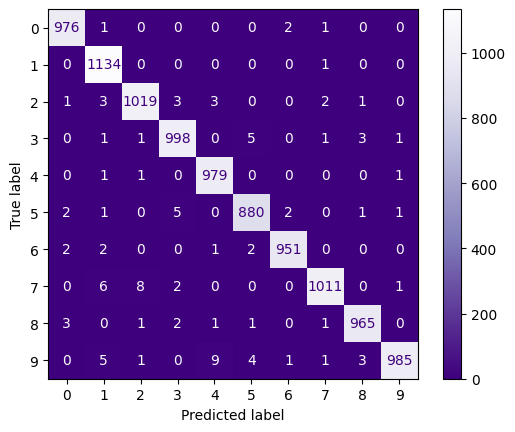

In [ ]:
disp.plot(cmap=plt.cm.Purples_r)
plt.show()

## The 2 models Accuracies: 

In [ ]:
val_loss_Cnn,val_acc_Cnn = model_CNN.evaluate (x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0386 - accuracy: 0.9898


In [ ]:
val_loss_Ann, val_acc_Ann = model_ANN.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0907 - accuracy: 0.9767


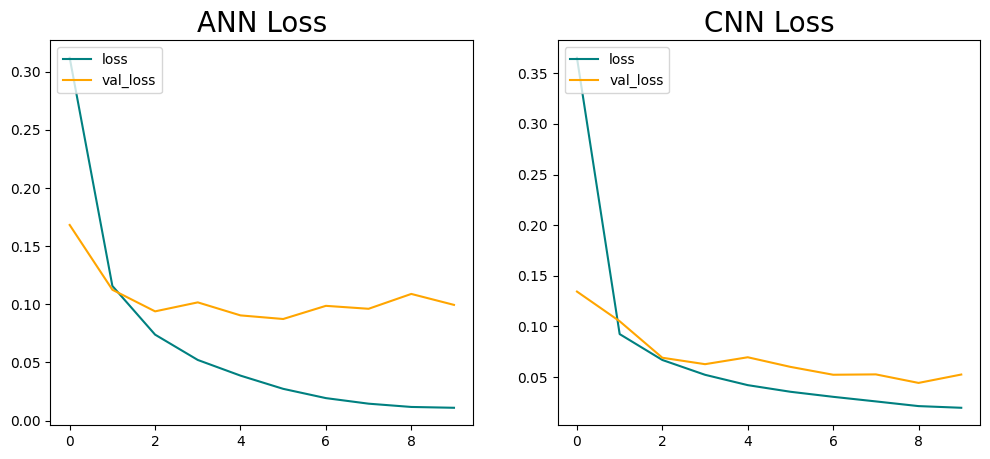

In [ ]:
fig = plt.figure(figsize= (12,5))

#ploting of the ANN Training/validation losses
fig.add_subplot(1,2,1)
plt.plot(history_ANN.history['loss'], color='teal', label='loss')
plt.plot(history_ANN.history['val_loss'], color='orange', label='val_loss')
plt.title('ANN Loss', fontsize=20)
plt.legend(loc="upper left")


#ploting of the CNN Training/validation losses
fig.add_subplot(1,2,2)
plt.plot(history_CNN.history['loss'], color='teal', label='loss')
plt.plot(history_CNN.history['val_loss'], color='orange', label='val_loss')
plt.title('CNN Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

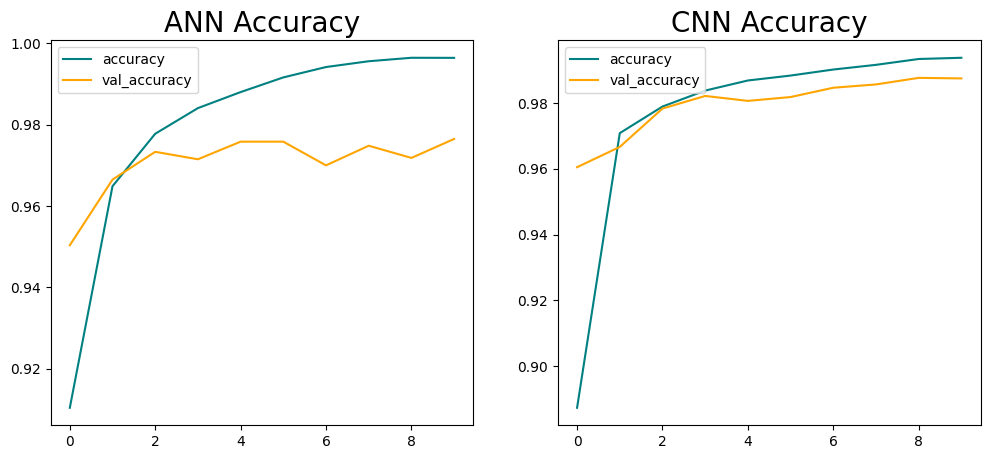

In [ ]:
fig = plt.figure(figsize = (12,5))

#ploting of the ANN Training/validation Accuracy
fig.add_subplot(1,2,1)
plt.plot(history_ANN.history['accuracy'], color='teal', label='accuracy')
plt.plot(history_ANN.history['val_accuracy'], color='orange', label='val_accuracy')
plt.title('ANN Accuracy', fontsize=20)
plt.legend(loc="upper left")


#ploting of the CNN Training/validation Accuracy
fig.add_subplot(1,2,2)
plt.plot(history_CNN.history['accuracy'], color='teal', label='accuracy')
plt.plot(history_CNN.history['val_accuracy'], color='orange', label='val_accuracy')
plt.title('CNN Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()